In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8711436257144187365, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17042840505398316451
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9316034932966528206
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7298761376
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13999991024602767598
 physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"]

In [2]:
import pandas as pd
from google.colab import files

In [3]:
# The followng code is for importing from the local drive< don't run this- go to the import from kaggle section>

In [4]:
cd /content

/content


In [5]:
pwd

'/content'

In [6]:
mkdir CNN

In [7]:
pwd

'/content'

In [8]:
mv dataset.zip CNN/

mv: cannot stat 'dataset.zip': No such file or directory


In [9]:
cd CNN

/content/CNN


In [10]:
ls

In [11]:
#import from Kaggle

In [12]:
cd /content

/content


In [13]:
pip install kaggle

In [14]:
files.upload() # create and upload new API token from own account

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"parijat2018","key":"aad30cdca5a696f52f3133ae2444e829"}'}

In [15]:
mkdir -p ~/.kaggle

In [16]:
cp kaggle.json ~/.kaggle/

In [17]:
!chmod 600 ~/.kaggle/kaggle.json 

In [18]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
#unzip dataset.zip

In [20]:
from zipfile import ZipFile
file_name="dogs-cats-images.zip" 

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [21]:
#rm dataset.zip

In [22]:
#mkdir -p dataset/training_set/cats

In [23]:
#mkdir -p dataset/training_set/dogs

In [24]:
#upload= files.upload()

In [25]:
#pip install keras

In [26]:
# Part 1 - Building the CNN

In [27]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [28]:
# Initialising the CNN
classifier = Sequential()

In [29]:
# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))

In [30]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [31]:
# Adding a second convolutional and max pooling layers
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [32]:
# Step 3 - Flattening
classifier.add(Flatten())

In [33]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [34]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
# Part 2 - Data scaling and augmentation

In [36]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
cd dog vs cat/dataset/training_set

/content/dog vs cat/dataset/training_set


In [38]:
cd ..

/content/dog vs cat/dataset


In [39]:
pwd

'/content/dog vs cat/dataset'

In [40]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [41]:
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [43]:
history = classifier.fit(training_set,
                         epochs = 25,
                         validation_data = test_set,
                         )

Epoch 1/25
250/250 [==============================] - 50s 201ms/step - loss: 0.6578 - accuracy: 0.6030 - val_loss: 0.6054 - val_accuracy: 0.6740
Epoch 2/25
250/250 [==============================] - 49s 195ms/step - loss: 0.6074 - accuracy: 0.6680 - val_loss: 0.6024 - val_accuracy: 0.6865
Epoch 3/25
250/250 [==============================] - 48s 192ms/step - loss: 0.5756 - accuracy: 0.6991 - val_loss: 0.5557 - val_accuracy: 0.7190
Epoch 4/25
250/250 [==============================] - 48s 192ms/step - loss: 0.5648 - accuracy: 0.7028 - val_loss: 0.5346 - val_accuracy: 0.7330
Epoch 5/25
250/250 [==============================] - 48s 190ms/step - loss: 0.5446 - accuracy: 0.7234 - val_loss: 0.5790 - val_accuracy: 0.6930
Epoch 6/25
250/250 [==============================] - 47s 189ms/step - loss: 0.5247 - accuracy: 0.7386 - val_loss: 0.5115 - val_accuracy: 0.7565
Epoch 7/25
250/250 [==============================] - 48s 190ms/step - loss: 0.5181 - accuracy: 0.7431 - val_loss: 0.4996 - val_ac

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
import matplotlib.pyplot as plt


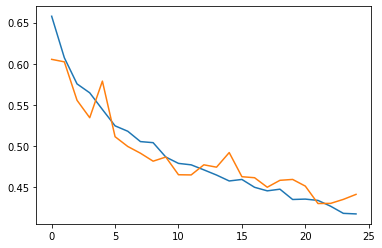

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

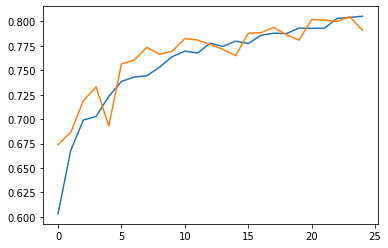

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()